In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from __future__ import division
import os
import cPickle as pickle
import pandas as pd
import loadmat
import numpy as np
from scipy import stats
import scipy as sp
import fdr_correct

In [16]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'

In [20]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')

df = pd.read_csv(filename)

In [21]:
filename_som = '/home/knight/matar/for_somayeh/JH2_details.csv'

In [22]:
df = df[(df.subj == 'JH2') & (df.task.isin(['EmoGen', 'EmoRep']))][['subj','task','elec','pattern','ROI']]
df.to_csv(filename_som)

In [7]:

filename = os.path.join(SJdir, 'PCA','Stats', 'Networks','unsmoothed','PCA_means','%s_%s_summary.txt' %(subj, task))
list_of_lists = []
with open(filename,'r') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        list_of_lists.append(inner_list)

tmp = [x[0].split(' ') for x in list_of_lists if x[0].split(' ')[0:2] == ['Proportion', 'Var']][0]
tmp = [t for t in tmp if len(t)>0]
pc1.append(tmp[2])

In [8]:
tmp

['Proportion',
 'Var',
 '0.14',
 '0.09',
 '0.08',
 '0.07',
 '0.06',
 '0.06',
 '0.05',
 '0.05']

['Proportion',
 'Var',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '0.14',
 '0.09',
 '0.08',
 '0.07',
 '0.06',
 '0.06',
 '0.05',
 '0.05']

In [117]:
subj, task = ('GP15', 'EmoGen')
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat')
data = loadmat.loadmat(filename)
srate = data['srate']
elecs = data['active_elecs']
RTs = data['RTs']
bl_st = data['Params']['bl_st']/1000*srate
data = data['data_percent']

In [118]:
overlapfile = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', subj+'_ovelapped_dur_elecs.csv')
df = pd.read_csv(overlapfile)
easy_overlap = df.easy.dropna()[np.in1d(df.overlapped_elecs.dropna(), df.easy.dropna())]
diff_overlap = df.difficult.dropna()[np.in1d(df.overlapped_elecs.dropna(), df.difficult.dropna())]
diff_unique = df.unique_to_diff.dropna()

In [122]:
diff_unique

0      5
1      9
2     10
3     12
4     13
5     14
7     18
9     21
11    27
12    52
13    54
Name: unique_to_diff, dtype: float64

In [ ]:
elec_dict = {'easy_overlap':easy_overlap, 'diff_overlap':diff_overlap, 'diff_unique':diff_unique}
data_dict = dict()

for k in elec_dict.keys():
    elec_list = elec_dict[k]
    eidx = np.in1d(elecs, elec_list)
    data_dict[k] = data[eidx,:,:].mean(axis = 1).mean(axis = 0)

In [116]:
for i, r in enumerate(RTs):
    continue
print x

146


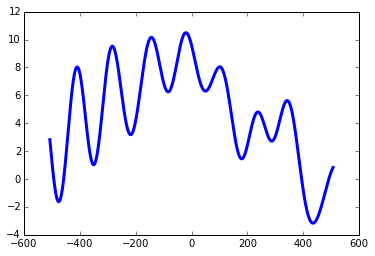

In [115]:
data = data_dict[k]
plt.plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = k)


In [113]:
resplocked = True
bl_st = int(bl_st)
RTs = RTs+abs(bl_st)
for k in elec_dict.keys():
    elec_list = elec_dict[k]
    eidx = np.in1d(elecs, elec_list)

    if resplocked:
        tmp = np.empty((data.shape[0], data.shape[1], len(np.arange(bl_st,abs(bl_st))))) #elecs x trials x time
        for j, e in enumerate(eidx): #elecs
            tmp2 = np.empty((data.shape[1], len(np.arange(bl_st, abs(bl_st))))) #per elec, trials x time
            for i, r in enumerate(RTs): #trials
                tmp2[i,:] = data[e,i,(r-abs(bl_st)):(r+abs(bl_st))]
            tmp[j, :, :] = tmp2
        data_dict[k] = tmp.mean(axis = 1).mean(axis = 0)    
    else:
        data_dict[k] = data[eidx,:,:].mean(axis = 1).mean(axis = 0)


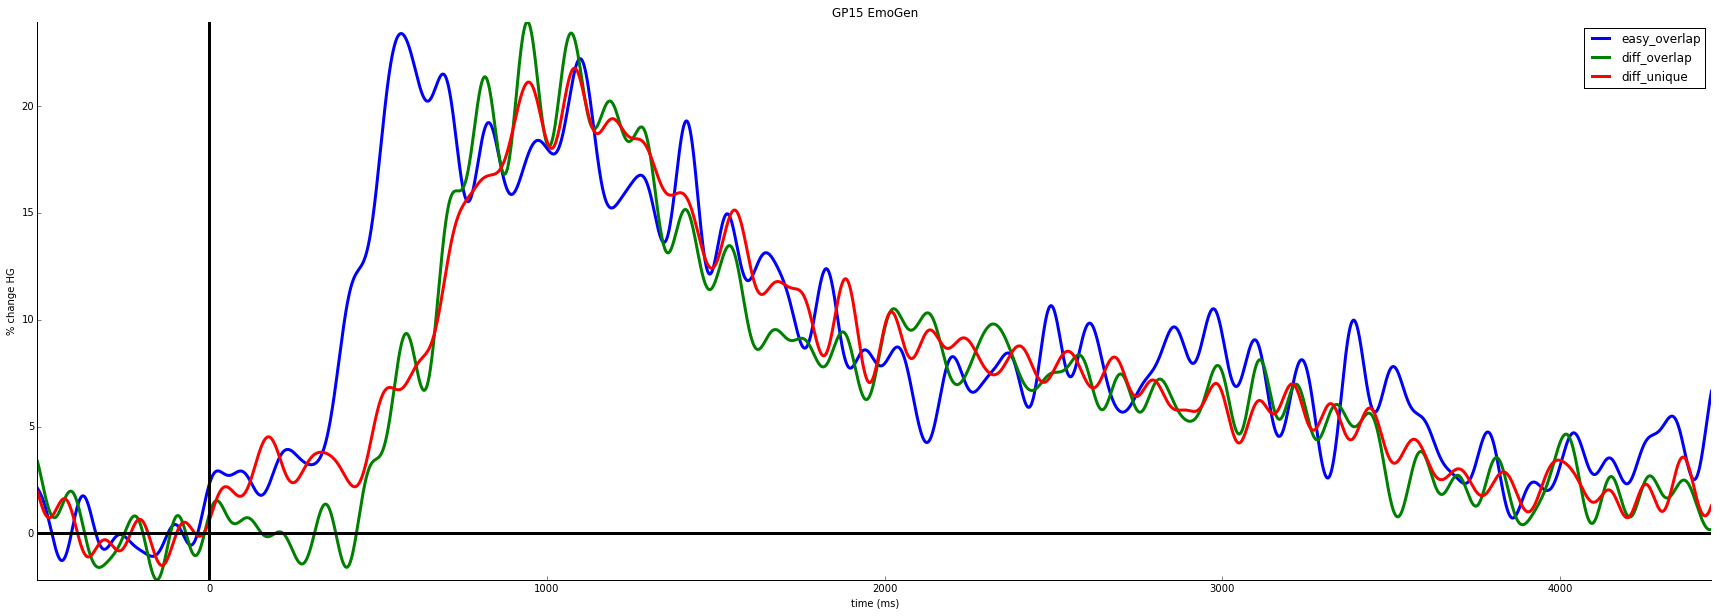

In [72]:
#plot
f, ax = plt.subplots(1, 1, figsize = (30,10))
scale_min = min([min(data_dict[x]) for x in data_dict.keys()])
scale_max = max([max(data_dict[x]) for x in data_dict.keys()])

tmp = (np.arange(scale_min, scale_max))

for i, k in enumerate(data_dict.keys()):
    data = data_dict[k]
    ax.plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = k)

ax.set_ylim([scale_min, scale_max])

ax.axhline(y = 0, color = 'k', lw = 3, label = None) #xaxis
ax.axvline(x = 0, color = 'k', lw = 3, label = None)

ax.set_ylabel('% change HG')
ax.set_xlabel('time (ms)')
ax.autoscale(tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
legend1 = ax.legend(loc = 'best')

ax.set_title(' '.join([subj, task]))
    #plt.savefig(os.path.join(SJdir, 'PCA', 'ShadePlots_hclust','elecs','significance_windows', 'smoothed', 'mean_traces', 'images','_'.join([subj,task, k, elecname])))
    #plt.close()

correlation between RTs and lag between D peak latency and D onsets : 0.60, p = 0.000


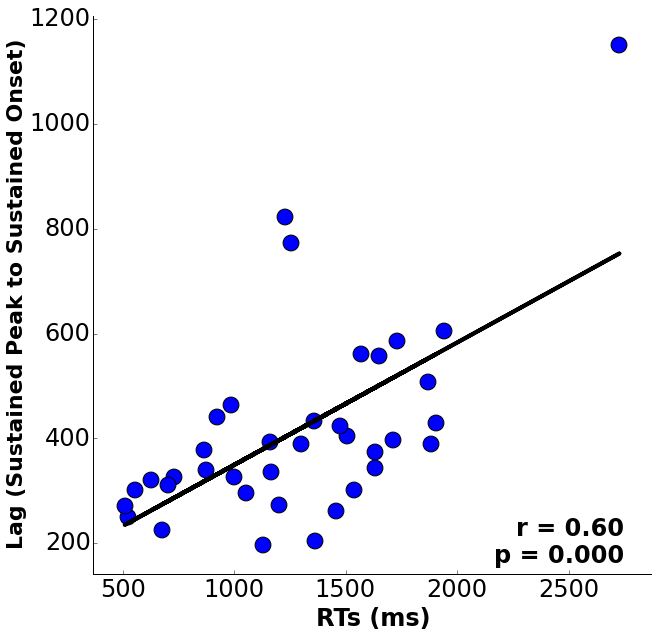

In [125]:
##correlate lag between duration peak latency and resp onset with RT (also for dur onset)
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
df_resp = df[df.pattern == 'R']
df_dur =  df[df.pattern == 'D']


## for duration onset with lag
D_lats_semistatic = df.groupby(['subj','task'])['lats_semi_static', 'start_idx'].mean() 
D_lats_semistatic = D_lats_semistatic.lats_semi_static + D_lats_semistatic.start_idx
D_onsets = df.groupby(['subj','task'])['start_idx'].mean()
rts = df.groupby(['subj','task'])['RTs_median'].mean()
DD_lag =D_lats_semistatic -  D_onsets

print 'correlation between RTs and lag between D peak latency and D onsets : %.2f, p = %.3f' %(stats.pearsonr(DD_lag, rts))

f, ax = plt.subplots(1,1, figsize = (10,10))
    
ax.patch.set_facecolor('white')
ax.autoscale(tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)

R, p = stats.pearsonr(DD_lag, rts)

A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(DD_lag))[0]
ax.plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax.text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax.transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


ax.scatter(rts,DD_lag, marker = 'o', s = 250)
ax.set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
ax.set_ylabel('Lag (Sustained Peak to Sustained Onset)',weight = 'bold', fontsize = 22)


#filename = os.path.join(savedir, 'DD_lag_vs_rts.png')
#plt.savefig(filename)
#print savedir

In [128]:
rts

subj  task       
CP7   DecisionAud    1227.000000
CP9   DecisionAud    1648.500000
GP15  EmoGen         1869.740740
      EmoRep          986.479933
      FaceEmo         729.415157
      FaceGen         702.873096
      SelfAud        1503.067083
      SelfVis         995.818806
GP28  SelfAud        1160.969408
      SelfVis        1566.473117
GP35  EmoGen         1298.103390
      EmoRep          873.921934
      FaceEmo         552.959604
      FaceGen         521.993866
JH10  EmoRep         1255.500000
      SelfAud        1730.000000
JH17  EmoRep         1162.000000
      SelfAud        1456.000000
      SelfVis        1198.500000
JH2   EmoGen         1904.000000
      FaceEmo         675.000000
      SelfAud        1632.000000
      SelfVis        1632.000000
JH5   EmoRep         1053.000000
JH6   FaceEmo         507.000000
      SelfAud        1882.000000
ST1   EmoGen         2727.934045
      SelfAud        1940.519569
ST15  EmoRep         1355.119669
      SelfAud        1713

In [136]:
df.query("subj == 'ST1' and task == 'EmoGen'").elec

781     3
782    15
783    16
784    63
785    71
786    72
Name: elec, dtype: int64

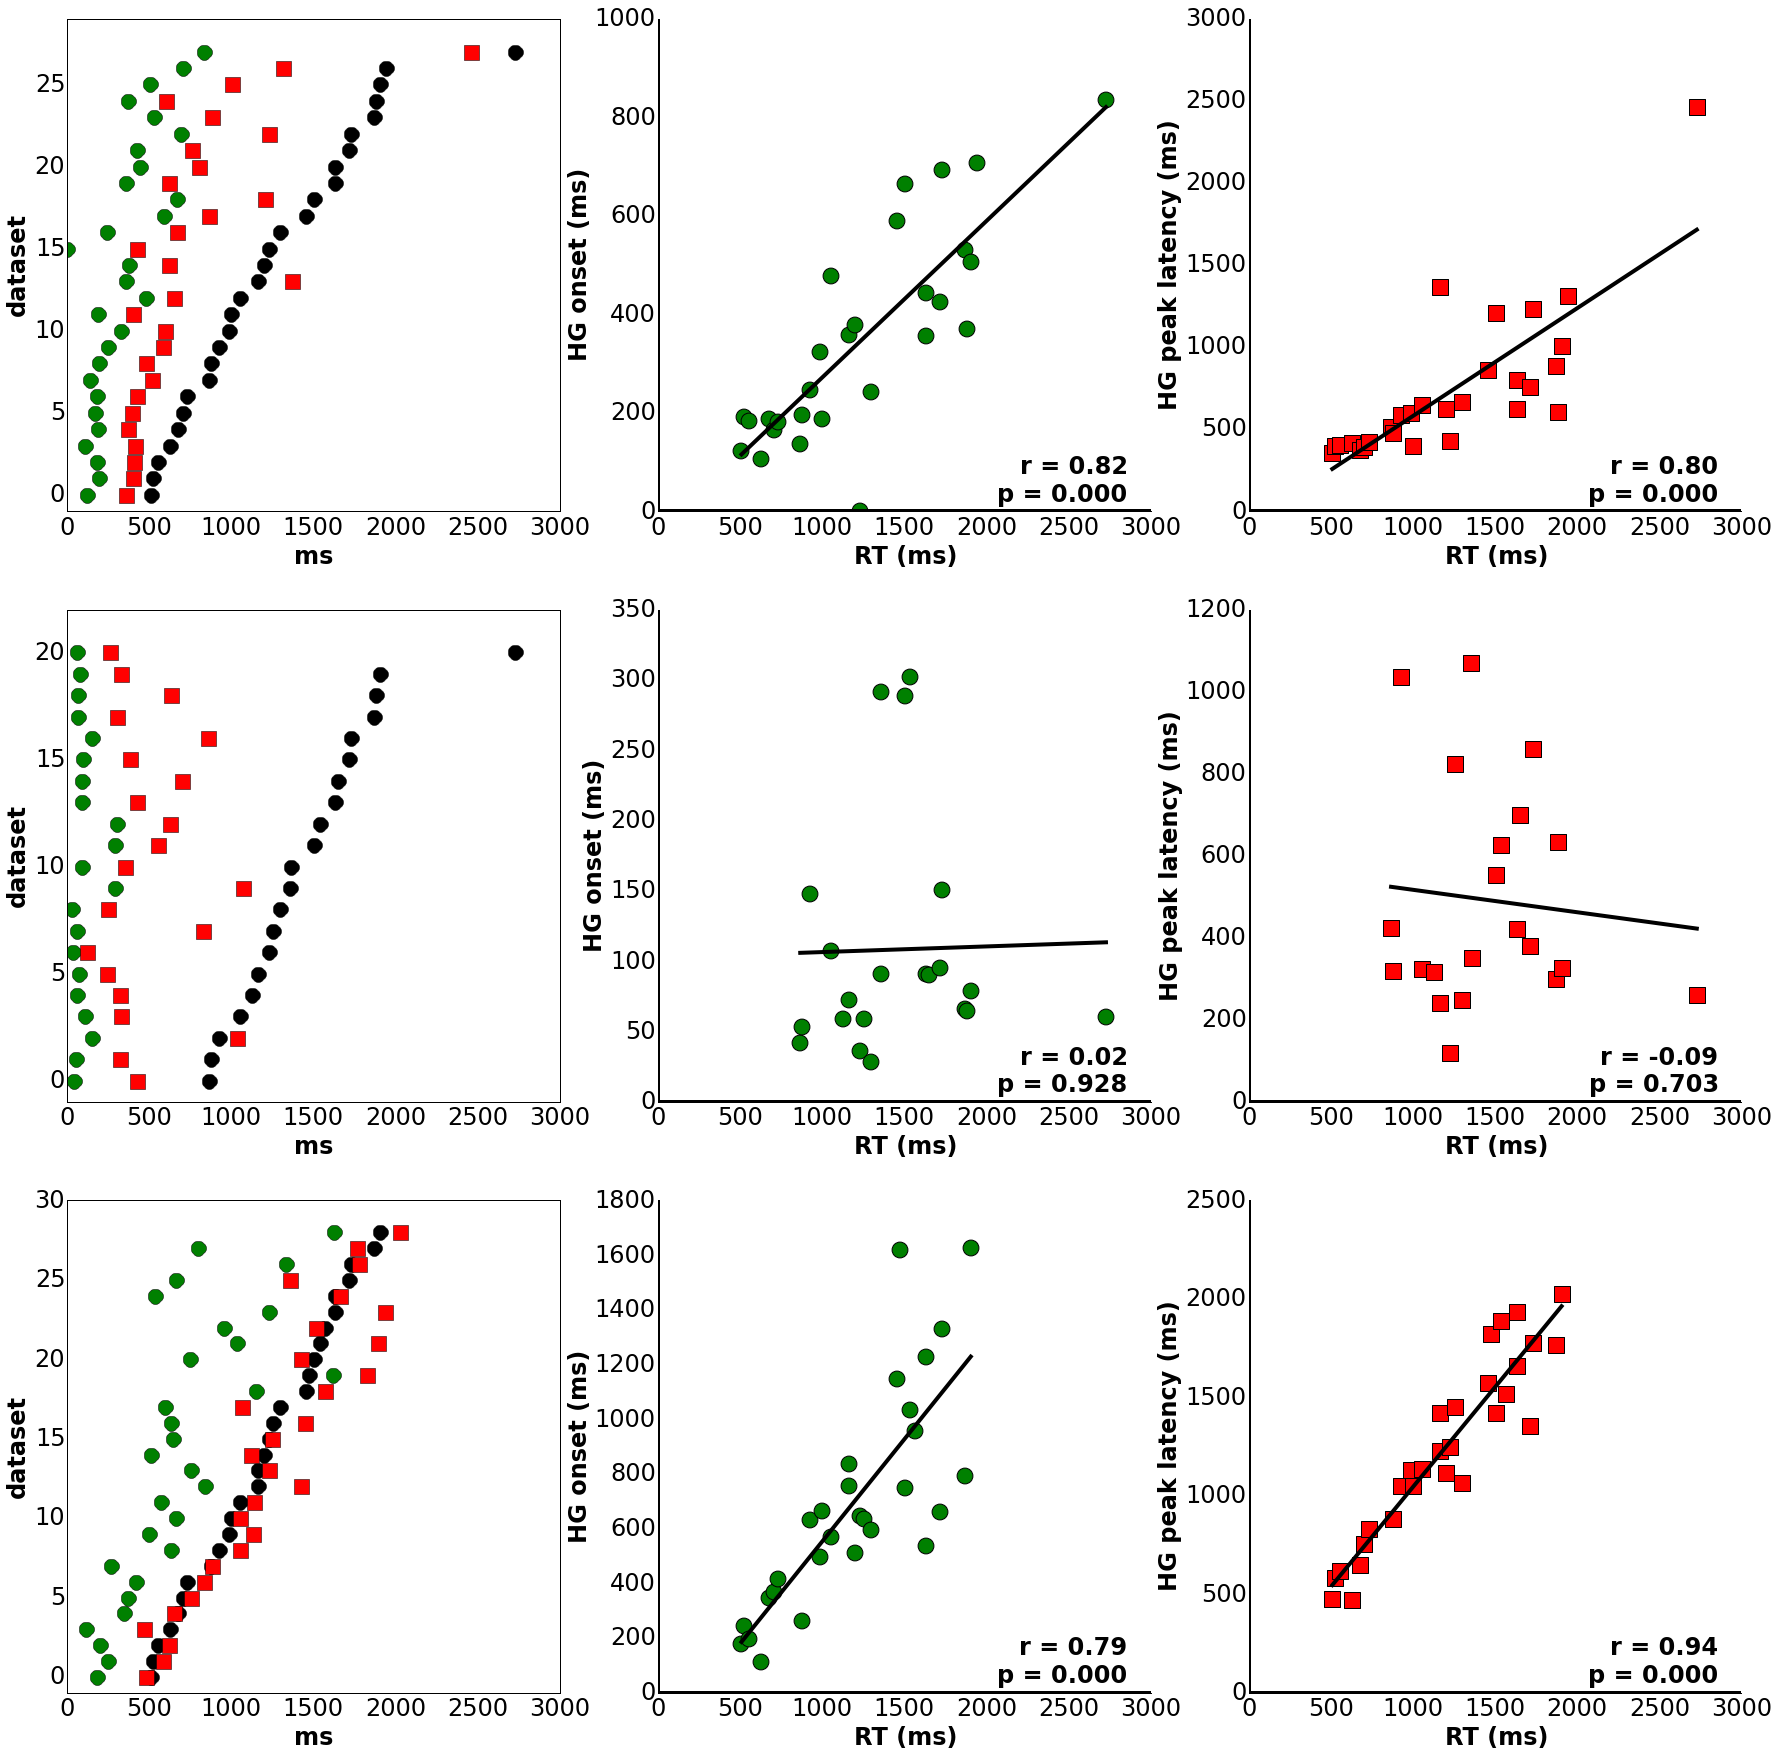

In [129]:
#'single trial' plot for all datasets for each type of elec

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

df['lats_semi_static_adjusted'] = df.lats_semi_static + df.start_idx

elec_types = ['D','SR','R']

f, ax = plt.subplots(3,3, figsize = (30,30))
#ax = ax.flatten()

for i, pattern in enumerate(elec_types):
    
    df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static_adjusted']].mean().sort('RTs_median') 
    num_datasets = df_sorted.shape[0]

    ax[i,0].plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 15, label = 'RT')
    ax[i,0].plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 15, label = 'HG onset')
    ax[i,0].plot(df_sorted.lats_semi_static_adjusted,np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 15, label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[i,0].set_xlabel('ms', weight = 'bold', fontsize = 24)
    ax[i,0].set_ylabel('dataset', weight = 'bold', fontsize = 24)
    ax[i,0].set_ylim([-1, num_datasets+1])
    ax[i,0].set_xlim([0,3000])
    ax[i,0].xaxis.set_tick_params(labelsize = 24)
    ax[i,0].yaxis.set_tick_params(labelsize = 24)
    ax[i,0].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
    
    #scatterplots - HGonsets
    onsets_semistatic = df_sorted['start_idx']
    rts = df_sorted.RTs_median
    
    ax[i,1].scatter(rts, onsets_semistatic, marker = 'o', s = 250, facecolor = 'g')
    R, p = stats.pearsonr(onsets_semistatic, rts)
    ax[i,1].set_ylabel('HG onset (ms)', weight = 'bold', fontsize = 24)

    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(onsets_semistatic))[0]
    ax[i,1].plot(rts,rts*m+c, color = 'k', linewidth = 4) 
    ax[i,1].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[i,1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')
    
    ax[0,1].set_ylim(ymin = 0) #hardcoded because of zero onset
    
    #scatterplots - latencies
    lats_semistatic = df_sorted['lats_semi_static_adjusted'] 
    
    ax[i,2].scatter(rts, lats_semistatic, marker = 's', s = 250, facecolor = 'r')
    R, p = stats.pearsonr(lats_semistatic, rts)
    ax[i,2].set_ylabel('HG peak latency (ms)',weight = 'bold', fontsize = 24)

    A = np.vstack([rts,np.ones(len(rts))]).T
    m,c = np.linalg.lstsq(A,np.array(lats_semistatic))[0]
    ax[i,2].plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
    ax[i,2].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[i,2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')

    for a in range(1,3):
        ax[i,a].patch.set_facecolor('white')
        ax[i,a].autoscale(tight=False)
        ax[i,a].spines['top'].set_visible(False)
        ax[i,a].spines['right'].set_visible(False)
        ax[i,a].set_xlabel('RT (ms)',weight = 'bold', fontsize = 24)
        ax[i,a].xaxis.set_tick_params(labelsize = 24)
        ax[i,a].yaxis.set_tick_params(labelsize = 24)
        ax[i,a].set_xlim([0, 3000])
        ax[i,a].tick_params( axis='both', which = 'both', top = 'off', bottom = 'off', right = 'off', left = 'off')
        ax[i,a].axhline(linewidth = 4, color = 'k')
        ax[i,a].axvline(linewidth = 4, color = 'k')



In [131]:
rts

subj  task       
JH6   FaceEmo         507.000000
GP35  FaceGen         521.993866
      FaceEmo         552.959604
ST32  DecisionVis     627.000000
JH2   FaceEmo         675.000000
GP15  FaceGen         702.873096
      FaceEmo         729.415157
GP35  EmoRep          873.921934
ST4   EmoRep          923.073898
GP15  EmoRep          986.479933
      SelfVis         995.818806
JH5   EmoRep         1053.000000
GP28  SelfAud        1160.969408
JH17  EmoRep         1162.000000
      SelfVis        1198.500000
CP7   DecisionAud    1227.000000
JH10  EmoRep         1255.500000
GP35  EmoGen         1298.103390
JH17  SelfAud        1456.000000
ST6   SelfVis        1473.575904
GP15  SelfAud        1503.067083
ST4   SelfAud        1536.490419
GP28  SelfVis        1566.473117
JH2   SelfAud        1632.000000
      SelfVis        1632.000000
ST15  SelfAud        1713.929011
JH10  SelfAud        1730.000000
GP15  EmoGen         1869.740740
JH2   EmoGen         1904.000000
Name: RTs_median, dtype: 

In [20]:
median_value = np.median(RTs)
shorttrials = RTs<median_value
longtrials = RTs>median_value

data[:,shorttrials,:].shape

(31, 73, 4958)

In [24]:
np.in1d(elecs, 5)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [4]:
#load data
p = 'SR'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_zscore_smooth_' + p + '.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs = [data_dict.get(key) for key in ['alldata','allRTs']]

In [9]:
for x, i in enumerate (allRTs):
    continue
print x
print i

23747
5225


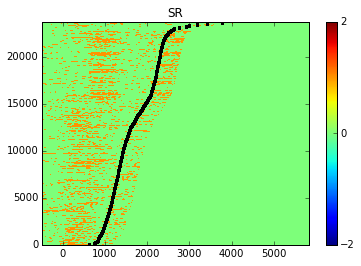

In [5]:
#plot
for i, x in enumerate(allRTs):
    alldata[i, x + 1000 ::] = np.nan #zero out everything 500 past RT (extra 500 bc of baseline)
    
f,ax = plt.subplots()
ax.autoscale(enable = True, tight = True)
cax = ax.pcolormesh(np.arange(-500, alldata.shape[1]-500), np.arange(0, len(allRTs)), alldata * abs(alldata)>1.96, zorder = 0)# , cmap = plt.get_cmap('bwr_r'))
cbar = f.colorbar(cax, ticks = [-2, 0 , 2], orientation = 'vertical')
cax.set_clim(vmin=-2,vmax=2)

for j in np.arange(len(allRTs)):
    ax.plot((allRTs[j], allRTs[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)

ax.set_title(p)

#filename= os.path.join(SJdir, 'SingleTrials', 'alltrials', 'jet', 'singletrials_allelecs_zscore_smooth_' + p + 'scale2_mask95ci.png')
#plt.savefig(filename)#, dpi = 300)

In [29]:
nozero = np.load('/home/knight/matar/nozero.npy')

In [33]:
nozero.shape

(42, 4958)

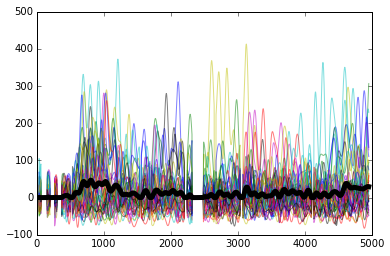

In [31]:
plot(nozero.transpose(),alpha = 0.5)
plot(nozero.mean(axis =0), 'k',lw = 5)

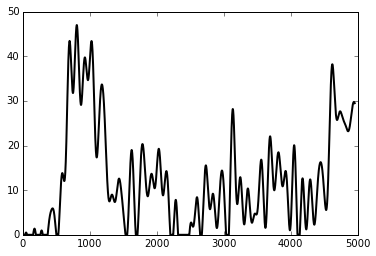

In [32]:
plt.plot(nozero.mean(axis = 0), 'k',lw = 2)

In [13]:
pvals = []
for j in np.arange(abs(500), nozero.shape[1]):
    (t, p) = stats.ttest_1samp(nozero[:,j], 0)
    pvals.append(p)
thr = fdr_correct.fdr2(pvals, q = 0.05)
H = np.array((pvals<thr)).astype('int')


In [66]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'

In [67]:
subj, task = ('GP15','EmoGen')

#load data
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent_empty.mat')
data_dict = loadmat.loadmat(filename)

active_elecs, Params, srate, RT, data_all = [data_dict.get(k) for k in ['active_elecs','Params','srate','RTs','data_percent']]

24


(31, 42, 4958)

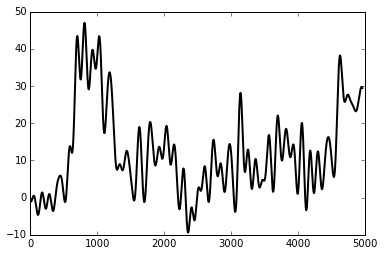

In [70]:
e = np.where(active_elecs == 53)[0][0]
print e
#plt.plot(data_all[e,:,:].transpose())
plt.plot(data_all[e,:,:].mean(axis = 0), 'k', lw = 2)
data_all.shape

In [134]:
_, subj, task, cluster, pattern, elec, start_idx, end_idx, start_idx_resp, end_idx_resp, _, _ = df_pattern.query("subj == 'GP15' and task == 'EmoGen' and elec == 5").values[0]


In [135]:
srate = float(srate)
data_all = data_all.mean(axis = 1) #mean across trials, (new shape is elecs x time)
bl_st = -500/1000*srate #in data points

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'data', ''.join([subj, '_', task, '.p']))
data_dict = pickle.load(open(filename, 'rb')) #keys are medians, means, for single trial values

medians, means, stds, maxes, lats, RTs, mins, lats_min, RTs_median, RTs_min, lats_static, lats_min_static, lats_semi_static = [dict() for i in range(13)]

RT = RT + abs(bl_st) #RTs are calculated from stim/cue onset, need to account for bl in HG_elecMTX_percent 

eidx = np.in1d(active_elecs, elec)
data = data_all[eidx,:].squeeze() #mean trace


#define start and end indices based on electrode type
if any([(pattern == 'S'), (pattern == 'sustained'), (pattern == 'S+sustained'), (pattern == 'SR')]):
    start_idx = start_idx + abs(bl_st)
    end_idx = end_idx + abs(bl_st)

if pattern == 'R': #calculate based on mean RT
    start_idx = np.median(RT) + start_idx_resp #for stimulus locked resp (should be median RT?)
    end_idx = np.median(RT) + end_idx_resp #for stimulus locked resp

if pattern == 'D':
    start_idx = start_idx + abs(bl_st)
    end_idx = np.median(RT) + end_idx_resp

In [75]:
df_pattern.query('subj == "GP35" and task == "EmoGen" and pattern == "D"')

,Unnamed: 0,subj,task,cluster,pattern,elec,start_idx,end_idx,start_idx_resp,end_idx_resp,Unnamed: 10,Unnamed: 11
64,64,GP35,EmoGen,2,D,4,113,NaN,NaN,326,NaN,NaN
65,65,GP35,EmoGen,2,D,5,190,NaN,NaN,185,NaN,NaN
66,66,GP35,EmoGen,2,D,7,370,NaN,NaN,102,NaN,NaN
67,67,GP35,EmoGen,2,D,11,371,NaN,NaN,178,NaN,NaN
68,68,GP35,EmoGen,2,D,12,267,NaN,NaN,458,NaN,NaN
69,69,GP35,EmoGen,2,D,19,164,NaN,NaN,155,NaN,NaN
70,70,GP35,EmoGen,2,D,24,60,NaN,NaN,137,NaN,NaN
71,71,GP35,EmoGen,2,D,27,217,NaN,NaN,225,NaN,NaN
72,72,GP35,EmoGen,2,D,32,157,NaN,NaN,427,NaN,NaN
73,73,GP35,EmoGen,2,D,33,403,NaN,NaN,210,NaN,NaN


-500

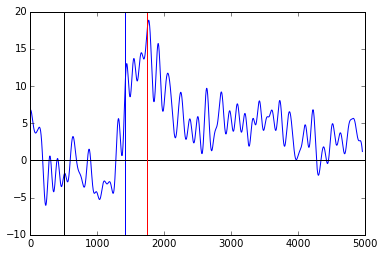

In [146]:
plt.plot(data)
plt.axvline(x = start_idx)
plt.axvline(x = 500, color= 'k')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = lats_static[elec]+abs((Params['bl_st']/1000*srate)),color = 'r')
Params['bl_st']


In [145]:
#calculate stats (mean trace)
means[elec] = np.nanmean(data_dict['means'][elec]) #from single trials
medians[elec] = np.nanmean(data_dict['medians'][elec]) #from single trials
maxes[elec] = data[start_idx:end_idx].max()
lats[elec] = (data[start_idx:end_idx].argmax()+1)/srate*1000
lats_min[elec] = (data[start_idx:end_idx].argmin()+1)/srate*1000
stds[elec] = data[start_idx:end_idx].std()
mins[elec] = data[start_idx:end_idx].min()
RTs[elec] = (RT+Params['bl_st']/1000*srate).mean()/srate*1000 #from stimulus onset (adjusted for all subjects)
RTs_median[elec] = np.median(RT+Params['bl_st']/1000*srate)/srate*1000 #from stimulus onset (adjusted for all subjects)
RTs_min[elec] = np.min(RT+Params['bl_st']/1000*srate)/srate*1000 #from stimulus onset (adjusted for all subjects)
lats_static[elec] = (data[(abs(Params['bl_st'])/1000*srate)::].argmax()+1)/srate*1000 #from stimulus onset to end (adjusted for all subjects)
lats_min_static[elec] = (data[(abs(Params['bl_st'])/1000*srate)::].argmin()+1)/srate*1000 #from stimulus onset to end (adjusted for all subjects)
lats_semi_static[elec] = (data[start_idx::].argmax()+1)/srate*1000

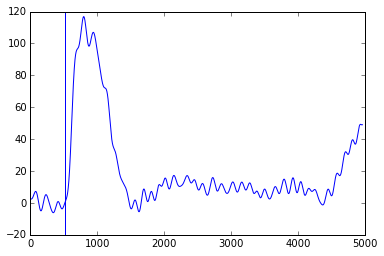

In [97]:
plt.plot(data_all[24,:,:].mean(axis = 0))
plt.axvline(x = abs(Params['bl_st']/1000*srate))

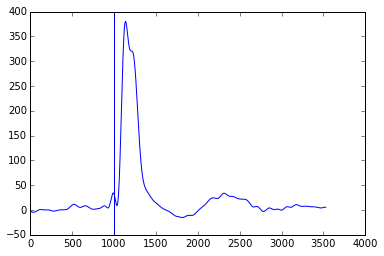

In [91]:
plt.plot(data_all[13,:,:].mean(axis = 0))
plt.axvline(x = abs(Params['bl_st']/1000*srate))

In [74]:
df_pattern.query('subj == "JH2" and task == "EmoGen" and pattern == "D"')

,Unnamed: 0,subj,task,cluster,pattern,elec,start_idx,end_idx,start_idx_resp,end_idx_resp,Unnamed: 10,Unnamed: 11
154,154,JH2,EmoGen,2,D,2,219,NaN,NaN,275,NaN,NaN
155,155,JH2,EmoGen,2,D,3,216,NaN,NaN,308,NaN,NaN
156,156,JH2,EmoGen,2,D,12,355,NaN,NaN,-207,NaN,NaN
157,157,JH2,EmoGen,2,D,13,29,NaN,NaN,500,NaN,NaN
158,158,JH2,EmoGen,2,D,134,267,NaN,NaN,439,NaN,NaN
159,159,JH2,EmoGen,3,D,4,529,NaN,NaN,-107,NaN,NaN
160,160,JH2,EmoGen,3,D,5,872,NaN,NaN,-38,NaN,NaN
161,161,JH2,EmoGen,3,D,14,312,NaN,NaN,420,NaN,NaN
162,162,JH2,EmoGen,3,D,15,661,NaN,NaN,-178,NaN,NaN
163,163,JH2,EmoGen,3,D,16,441,NaN,NaN,500,NaN,NaN


In [73]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir,'PCA', 'Stats', 'single_electrode_windows_csvs', 'single_electrode_windows_withdesignation_EDITED.csv')
df_pattern = pd.read_csv(filename)

In [101]:
df_pattern.query("subj == 'ST27' and elec == 41")

,Unnamed: 0,subj,task,cluster,pattern,elec,start_idx,end_idx,start_idx_resp,end_idx_resp,Unnamed: 10,Unnamed: 11
938,939,ST27,DecisionVis,3,SR,41,500,1057,287,500,NaN,NaN


In [171]:
filename = os.path.join(SJdir, 'PCA','Stats','Networks','unsmoothed','PCA_medians','networks', 'all_subjects_thresh_medians.csv')
df_pc = pd.read_csv(filename)

df_pc = df_pc.merge(df_pattern[['subj','task','elec','cluster']])
df_pc = df_pc[['subj','task','elec','cluster','pattern','max_pc','pc_list','ROI']]

filename = os.path.join(SJdir, 'PCA','Stats','Networks','unsmoothed','PCA_medians','networks', 'all_subjects_thresh_medians_withclusters.csv')
df_pc.to_csv(filename, index = False)

In [152]:
data_dict, start_idx, end_idx, start_idx_resp, end_idx_resp = SP.stats_static250('GP15', 'EmoGen', df_pattern)

##reject outliers
data_dict_clean = SP.reject_outliers('GP15_EmoGen', data_dict, start_idx, end_idx, start_idx_resp, end_idx_resp)

#run regression for stim and resp
lock = 'resp'
coef, score, alpha, pvals, nulls = SP.run_regression(DATASET,  data_dict_clean[lock])



5...10...13...18...27...66...9...17...19...21...67...12...14...25...52...54...68...22...23...29...30...31...37...38...42...44...45...53...63...running regression
5 0.108060257928 0.26
9 0.06741587251 0.39
10 -0.0843358923139 0.34
12 0.10998227798 0.15
13 0.192450656155 0.14
14 0.191180354757 0.15
17 0.153236342255 0.19
18 -0.0528616782986 0.39
19 -0.0855975212394 0.34
21 0.11234532257 0.22
22 0.163600612406 0.19
23 0.246084195178 0.07
25 -0.153172799721 0.16
27 0.0719801364203 0.34
29 -0.148850872069 0.23
30 0.0491386998566 0.39
31 0.239786120542 0.07
37 0.130840593547 0.23
38 -0.197263681932 0.14
42 0.16824209724 0.14
44 -0.191366006495 0.15
45 0.0489975078275 0.38
52 0.340873918803 0.02
53 0.132417119186 0.17
54 0.327174489739 0.06
63 0.108583807507 0.27
66 0.312954650845 0.02
67 0.211184724631 0.16
68 0.188441937428 0.19


0.26000000000000001

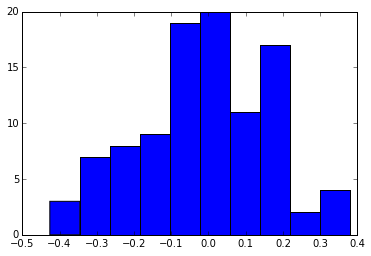

In [167]:
hist(nulls[5])
score[5]
sum(nulls[5]>score[5])/100

0.021000000000000001

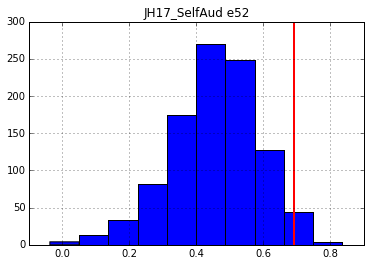

In [139]:
DATASET = 'JH17_SelfAud'
filename = os.path.join(SJdir, 'PCA','Stats', 'Regression','unsmoothed','maxes_medians','surr_distributions', '_'.join([DATASET, 'scores_surr_dist.csv']))
df_surr = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA','Stats', 'Regression','unsmoothed','maxes_medians', 'no_short_windows', '_'.join([DATASET, 'coefs.csv']))
df = pd.read_csv(filename)
real_score = df.iloc[df["Unnamed: 0"].values == 52].pred_score

f, ax = plt.subplots()
df_surr['52'].hist(ax = ax)
plt.axvline(x = real_score.iloc[0], color = 'red', lw = 2)
ax.set_title('%s e%i' %(DATASET, 52))

sum(df_surr['52']>real_score.iloc[0])/df_surr.shape[0]


In [6]:
#CROSS CORR
subj, task = ('GP15','EmoGen')

#load data
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent_unsmoothed.mat')
data_dict = loadmat.loadmat(filename)

active_elecs, Params, srate, RT, data_all = [data_dict.get(k) for k in ['active_elecs','Params','srate','RTs','data_percent']]

In [7]:
e5 = data_all[1,:]
e9 = data_all[2,:]
print e5.shape

from scipy import signal
tmp, tmp2 = [[] for i in range(2)]
for i in range(e5.shape[0]):
    tmp.append(signal.correlate(e5[i,:], e9[i,:], mode = 'same'))
    tmp2.append(signal.correlate(e5[i,:], e5[i,:], mode = 'same'))



(147, 4958)


In [74]:
x = np.array(tmp).shape[1]/2
x = np.arange(-x,x)

#plt.plot(x, mean(np.array(tmp), axis = 0))

x[np.argmax(mean(np.array(tmp), axis = 0))]

x[0]

-2479.0

(147, 4958)

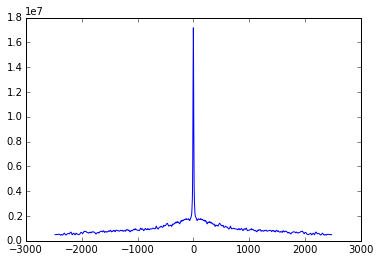

In [50]:

x = np.array(tmp2).shape[1]/2
plt.plot(np.arange(-x, x), mean(np.array(tmp2), axis = 0))

In [ ]:
tmp2 = signal.correlate(e5, e9, mode = 'same')

In [ ]:
#Do the correlation. x and y is the x and y components of your data (x is time and y is whatever you are modeling),
#template is what you are cross-correlating with
ycorr = scipy.correlate(y, template mode="full")

#Generate an x axis
xcorr = numpy.arange(ycorr.size)

#Convert this into lag units, but still not really physical
lags = xcorr - (y.size-1)
distancePerLag = (x[-1] - x[0])/float(x.size)  #This is just the x-spacing (or for you, the timestep) in your data

#Convert your lags into physical units
offsets = -lags*distancePerLag

In [ ]:
from statsmodels import tsa.stattools


4957.5
2479.0
2479.0


439021

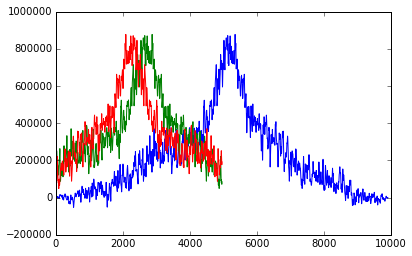

In [27]:
tmp = np.load('/home/knight/matar/tmp.npy')
plot(tmp.mean(axis = 0))
print tmp.shape[1]/2
np.argmax(tmp)

tmp = np.load('/home/knight/matar/tmp_same.npy')
plot(tmp.mean(axis = 0))
print tmp.shape[1]/2
np.argmax(tmp)


tmp = np.load('/home/knight/matar/tmp_same_9to5.npy')
plot(tmp.mean(axis = 0))
print tmp.shape[1]/2
np.argmax(tmp)




array([[ 1.        ,  0.11947889],
       [ 0.11947889,  1.        ]])

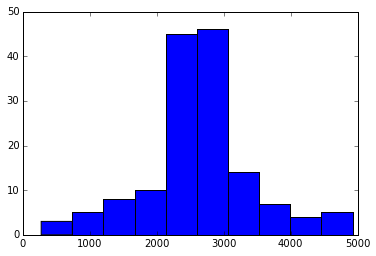

In [26]:
hist(np.argmax(tmp,axis = 1))

np.corrcoef(np.argmax(tmp, axis = 1), RT)

In [ ]:
tmp = []
for i in range(e5.shape[0]):
    tmp.append(signal.correlate(e5[i,:], e9[i,:], mode = 'valid'))


In [127]:
subj, task, elec, pattern, start_idx, end_idx_resp = ('GP28','SelfAud',3, 'D', 617, -65)
 
#load data
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent_unsmoothed.mat')
data_dict = loadmat.loadmat(filename)

active_elecs, Params, srate, RT, data_all = [data_dict.get(k) for k in ['active_elecs','Params','srate','RTs','data_percent']]
bl_st = 500/1000*srate #for my data, remove cue from baseline - start/end_idx are relative to cue onset) - change 12/24 - okay with RT 12/25
        
RT = RT + abs(bl_st) #RTs are calculated from stim (my data cue) onset, need to account for bl in HG_elecMTX_percent (for 500, not 1000 baseline 12/25)

maxes_idx, medians_idx, cofvar, maxes_rel, medians, means, stds, maxes, lats, sums, lats_pro, RTs, num_dropped, mins, lats_min = [dict() for i in range(15)]

eidx = np.in1d(active_elecs, elec)
data = data_all[eidx,:,:].squeeze()

start_idx = start_idx + abs(bl_st)
end_idx_resp = end_idx_resp

#create data matrices
data_dur = np.empty(data.shape)
for j, r in enumerate(RT):
    tmp = data[j, start_idx : r + end_idx_resp]
    tmp = np.pad(tmp, (0, data.shape[1]-len(tmp)), 'constant', constant_values = -999)
    data_dur[j,:] = tmp
data_dur[data_dur == -999] = np.nan
    
nanidx = np.isnan(np.nanmean(data_dur, axis = 1)) #if start > end
if np.any(nanidx):
    #drop equivalent number of long RTs
    num_to_drop = np.sum(nanidx)
    i = np.argpartition(RT, -num_to_drop)[-num_to_drop :] #find the indices of the longest RTs
    nanidx[i] = True #mark the long trials as bad too
    data_dur[nanidx, :] = np.nan

    #drop nan from RTs
    tmp_RT = np.ndarray.astype(RT, dtype = float)
    tmp_RT[nanidx] = np.nan
    RTs[elec] = tmp_RT
else:
    RTs[elec] = RT     

#make surrogate data
data_surr = data_dur.flatten() #take HG window
data_surr_drop = np.isnan(data_surr) #for data_idx dropping points based on data_surr
data_surr = data_surr[~np.isnan(data_surr)] #drop nan datapoints (pull out only HG)
randidx = np.random.permutation(len(data_surr)) #shuffle
data_surr = data_surr[randidx]

starts, lengths = [[] for x in range(2)]
#reshape data_surr with nan
data_dur_surr = np.empty_like(data_dur)
start = 0
for j in range(data_dur.shape[0]):
    trial_length = sum(~np.isnan(data_dur[j,:]))
    lengths.append(trial_length)
    if j>0:
        start = end
    end = start + trial_length
    if trial_length>0: #not a nan trial
        tmp = data_surr[start:end]
        tmp = np.pad(tmp, (0, data_dur.shape[1]-len(tmp)), 'constant', constant_values = -999)
        data_dur_surr[j,:] = tmp
        starts.append((start, end))

    else: #nan trial
        data_dur_surr[j,:] = -999
data_dur_surr[data_dur_surr == -999] = np.nan


In [131]:
data_dur[:,0]

array([ 149.52018114,   37.88836879,   43.00597354,   16.20880248,
         47.09852428,  185.44887932,  -35.90029485,  -13.58111445,
        -50.58230083,   24.06830665,   49.16871105,    2.69725572,
        -70.45687032,   44.06760818,   -8.46727844,   77.78893984,
        -14.5055401 ,   42.86121438,  -19.47190045,   -5.61862883,
        -49.08723513,  146.26370466,   57.17221312,  194.18827947,
         -2.0074341 ,  -68.32838537,  203.75833114,   28.05274569,
         45.99724917,   12.49624873,  -25.88088558,   10.23821706,
        -13.9708193 ,    7.95711033,  -15.41002254,  -35.388256  ,
        -52.00942302,  -14.14204582,  -66.98144858,  166.09570008,
        -27.36230108,    9.34969331,  -18.21309289,  -62.94966614,
        -22.12518769,  -29.23396555,  250.16862643,   97.1792065 ,
         -5.19355819,  -64.78998705,  -82.70198617,  125.6255564 ,
        -87.36668645,  -43.67636315,  -20.83802718,  -44.84942558,
        -57.89381485,   22.7876493 ,   85.12526619,   -6.27556

In [128]:
tmp2 = data_surr[start:end]
blah = np.pad(tmp2, (0, data_dur.shape[1]-len(tmp2)), 'constant', constant_values = -999)

print data_surr.shape
print(start, end)

end - data_surr.shape[0]


x = range(30)
print x[0:10]
print x[10:15]

(46751,)
(46683, 46751)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 11, 12, 13, 14]


In [84]:
f, ax = plt.subplots()
ax.pcolor(data_dur, vmin = np.nanmin(data_dur), vmax = np.nanmax(data_dur))

f, ax1 = plt.subplots()
ax1.pcolor(data_dur_surr, vmin = np.nanmin(data_dur_surr), vmax = np.nanmax(data_dur_surr))


In [32]:
folder = 'maxes_medians'
filename = os.path.join(SJdir, 'PCA','Stats','Regression','unsmoothed',folder,'no_short_windows', 'all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
df.query("subj == 'GP15' and task == 'EmoGen' and elec == 5")

,subj,task,elec,pattern,medians,maxes_rel,pred_score,ci_low pred score,ci_high pred score,pval_predscore,alpha,ROI
17,GP15,EmoGen,5,D,-0.294161,0.474543,0.441719,0.176363,0.662547,0.01,2.782559,MFG


In [47]:
f, ax = plt.subplots()
ax.hist(tmp['5'], label = 'rand surr maxes')
ax.legend()
plt.close('all')

In [25]:
f, ax = plt.subplots()
ax.hist(tmpcirc['5'], alpha = 0.5, bins = 20, label = 'circ')
ax.hist(tmp['5'], alpha = 0.5, bins = 20, label = 'rand')
ax.hist(real['5'], alpha = 0.5, bins = 20, label = 'real')
ax.legend()

In [76]:
print bl_st
print type(Params['bl_st'])
type(srate)
type(bl_st)


-508.626666667
<type 'int'>


float

In [65]:
tmp = loadmat.loadmat((os.path.join(SJdir, 'Subjs','JH2','EmoGen', 'subj_globals.mat')))
tmp['srate']

1000

In [37]:
id_num = 60 #for surrogate

features = ['maxes_rel','medians', 'RTs', 'maxes_idx', 'medians_idx', 'maxes', 'means', 'stds', 'mins']

subj, task = ('GP28', 'SelfAud')

for f in features:

    #load csv file
    filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'csv_files','orig', 'surr_'+str(id_num), '_'.join([subj, task, f+'_surr.csv']))
    data = pd.read_csv(filename)

    ##drop specific elecs
    #if '_'.join([subj, task]) in bad_df.subj_task.values:
    #    elec_to_drop = bad_df[bad_df.subj_task == '_'.join([subj, task])].elec
    #    data.pop(str(elec_to_drop.values[0]))

    #drop NA trials
    data = data.dropna() 
    print(f, data.shape)
    #filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'csv_files', 'surr_'+str(id_num), '_'.join([subj, task, f]) + '_surr.csv')
    #data.to_csv(filename, index = False)

('maxes_rel', (73, 26))
('medians', (73, 26))
('RTs', (74, 26))
('maxes_idx', (73, 26))
('medians_idx', (73, 26))
('maxes', (73, 26))
('means', (73, 26))
('stds', (73, 26))
('mins', (73, 26))


In [27]:
filename = os.path.join(SJdir, 'PCA','Stats', 'outliers', 'for_Regression', 'unsmoothed', folder, 'GP15_EmoGen.p')
data_dict = pickle.load(open (filename, 'rb'))

f = 'medians'
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'csv_files',  '_'.join(['GP15', 'EmoGen', f]))
df = pd.read_csv(filename + '.csv')

print data_dict[27].shape
df.shape

NameError: name 'folder' is not defined

In [246]:
folder = 'maxes_medians'
filename = os.path.join(SJdir, 'PCA','Stats','Regression','unsmoothed',folder,'no_short_windows', 'all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA','Stats','Regression','unsmoothed',folder,'no_short_windows', 'circshift', 'all_coefs_withpatterns_withROIs_circ.csv')
dfcirc = pd.read_csv(filename)

In [254]:
pd.concat([df.query("subj == 'GP15' and task == 'EmoGen'")[['elec','pattern','pred_score','pval_predscore','ROI']],dfcirc.query("subj == 'GP15' and task == 'EmoGen'")[['pred_score','pval_predscore']]], axis = 1)
np.corrcoef(df.query("subj == 'ST27' and task == 'DecisionVis'")['pred_score'],dfcirc.query("subj == 'ST27' and task == 'DecisionVis'")['pred_score'])
np.corrcoef(df.pred_score, dfcirc.pred_score)

array([[ 1.        ,  0.34786142],
       [ 0.34786142,  1.        ]])

In [210]:
subj, task, elec, pattern, start_idx, end_idx_resp = ('GP44', 'DecisionAud', 74, 'D', 244, -7 )
    
#load data
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat') 
data_dict = loadmat.loadmat(filename)

active_elecs, Params, srate, RT, data_trials = [data_dict.get(k) for k in ['active_elecs','Params','srate','RTs','data_percent']]
data_all = data_trials.mean(axis = 1) #mean across trials, (new shape is elecs x time)
bl_st = Params['bl_st']
bl_st = bl_st/1000*srate

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'data', ''.join([subj, '_', task, '.p']))
data_dict = pickle.load(open(filename, 'rb')) #keys are medians, means, for single trial values

maxes_rel, medians, means, stds, maxes, lats, lats_pro, RTs, mins, lats_min, RTs_median = [dict() for i in range(11)]

if task in ['DecisionAud', 'DecisionVis']:
    bl_st = -500/1000*srate #remove cue from baseline - start/end_idx are relative to stim onset)

RT = RT + abs(bl_st) #RTs are calculated from stim onset, need to account for bl in HG_elecMTX_percent

eidx = np.in1d(active_elecs, elec)
data = data_all[eidx,:].squeeze()

#define start and end indices based on electrode type
if any([(pattern == 'S'), (pattern == 'sustained'), (pattern == 'S+sustained'), (pattern == 'SR')]):
    start_idx = start_idx + abs(bl_st)
    end_idx = end_idx + abs(bl_st)

if pattern == 'R': #calculate based on mean RT
    start_idx = RT.mean() + start_idx_resp #for stimulus locked resp
    end_idx = RT.mean() + end_idx_resp  #for stimulus locked resp

if pattern == 'D':
    start_idx = start_idx + abs(bl_st)
    end_idx = RT.mean() + end_idx_resp 


In [199]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df_all = pd.read_csv(filename)
df_all.query("subj == 'ST27'  and elec== 5")

,subj,task,elec,pattern,cluster,start_idx,end_idx,start_idx_resp,end_idx_resp,RTs,RTs_median,lats,lats_min,maxes,means,medians,ROI
840,ST27,DecisionVis,5,D,4,500,NaN,NaN,446,2396.276029,2365,59.8,1841,50.737836,24.883352,14.562138,Pre_centrl


In [212]:
plot(range(-500, data.shape[0]-500), data)
plt.axvline(start_idx-500)
plt.axvline(end_idx-500)
print (start_idx, end_idx)
data[start_idx:end_idx].max()
print data[start_idx:end_idx].mean()
print np.median(RT)


(752.6266666666668, 1231.932010178117)
5.01472411457
1223.62666667


In [209]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'data', 'mydata_wrong',''.join(['GP15', '_', 'EmoGen', '.p']))
data_dict = pickle.load(open(filename, 'rb')) #keys are medians, means, for single trial values
np.nanmean(data_dict['medians'][27])

4.442801928566479

In [112]:
for k in data_dict.keys():
        if k in ['bl_st', 'srate','active_elecs', 'dropped']:
            continue
        data = pd.DataFrame(data_dict[k])

In [132]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'data', ''.join([subj, '_', task, '.p']))
data_dict = pickle.load(open(filename, 'rb'))
data_dict['medians'][5].mean()

3.4731809112666863

In [53]:
filename = os.path.join(SJdir, 'PCA','Stats','outliers','for_Regression', 'unsmoothed','maxes_medians','no_short_windows','surr_50','GP15_EmoGen_surr.p')
data_dict_surr = pickle.load(open(filename,'rb'))

filename = os.path.join(SJdir, 'PCA','Stats','outliers','for_Regression', 'unsmoothed','maxes_medians','no_short_windows','GP15_EmoGen.p')
data_dict = pickle.load(open(filename,'rb'))

pd.concat([data_dict[5], data_dict_surr[5]], axis = 1)

np.where(~np.in1d(data_dict_surr[5].RTs, data_dict[5].RTs))
data_dict[5].RTs[80:84]
data_dict_surr[5].RTs[80:85]

folder = 'maxes_medians'
id_num = 50
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'unsmoothed', folder, 'no_short_windows', 'surr_'+str(id_num), '_'.join(['GP15', 'EmoGen','coefs_surr.csv']))
df_surr = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'unsmoothed', folder, 'no_short_windows', '_'.join(['GP15', 'EmoGen','coefs.csv']))
df = pd.read_csv(filename)


np.corrcoef(df.pred_score, df_surr.pred_score)

array([[ 1.        ,  0.38322866],
       [ 0.38322866,  1.        ]])

In [19]:
trials_to_drop.iloc[121,15]

True

In [8]:

df_idx = pd.read_csv('/home/knight/matar/CP7_DecisionAud_e11_data_idx.csv')

#features_to_consider = ['maxes_rel','medians']
features_to_consider = ['means','stds']
#features_to_consider = ['maxes_rel','medians', 'stds']

predictor = 'RTs'
#features_plus_predictor = ['RTs','maxes_rel','medians']
features_plus_predictor = ['RTs','means','stds']
#features_plus_predictor = ['RTs','maxes_rel','medians', 'stds']

subjs, tasks, num_total, num_to_drop, feature_list, all_elecs = [[] for i in range(6)]

df_dict, data_dict = [dict() for d in range(2)]

subj, task, elec = ('CP7','DecisionAud', 11)

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'csv_files',  '_'.join([subj, task, predictor]))
df_RT = pd.read_csv(filename + '.csv')
df_RT.columns = [int(x) for x in df_RT.columns]
df_dict['RTs'] = df_RT

#find outlier trials
for f in features_to_consider:
    filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'unsmoothed', 'csv_files', '_'.join([subj, task, f]))
    df = pd.read_csv(filename + '.csv')

    trials_to_drop = df.apply(lambda x: ((x > (x.mean() + x.std(ddof = 1)*std_thresh)) | (x < (x.mean() - x.std(ddof = 1)* std_thresh))))

    masked_values = np.where(~trials_to_drop, df.values, np.nan) #good trials

    tmp = pd.DataFrame(masked_values, **df_idx._construct_axes_dict()) #new dataframe with dropped trials for 1 feature
    tmp.columns = [int(x) for x in tmp.columns]
    df_dict[f] = tmp

    #drop nans for all features for an electrode    
    for elec in df_dict[f].columns:
        
        data_array = np.array([df_dict[x][elec] for x in features_plus_predictor]) #features x trials

        trials_to_drop = np.any(np.isnan(data_array), axis = 0)
        
        if np.any(trials_to_drop):
            tmp = [features_plus_predictor[i] for i in np.where(np.isnan(data_array))[0]]
            feature_list.append(tmp)
        else:
            feature_list.append('')
            
        data_array = data_array[:,~trials_to_drop]
        
        data_dict[elec] = pd.DataFrame(data_array.T, columns = features_plus_predictor)
        

ValueError: Shape of passed values is (17, 124), indices imply (782, 124)

In [133]:
subj, task, cluster, pattern, elec, start_idx, end_idx, start_idx_resp, end_idx_resp, dropped, ROI = df.iloc[293] 

filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat')
data_dict = loadmat.loadmat(filename)

active_elecs, Params, srate, RT, data_all = [data_dict.get(k) for k in ['active_elecs','Params','srate','RTs','data_percent']]
bl_st = Params['bl_st']
bl_st = bl_st/1000*srate

cofvar, maxes_rel, medians, means, stds, maxes, lats, sums, lats_pro, RTs, num_dropped, mins, lats_min = [dict() for i in range(13)]
        
RT = RT + abs(bl_st) #RTs are calculated from stim onset, need to account for bl in HG_elecMTX_percent

eidx = np.in1d(active_elecs, elec)
data = data_all[eidx,:,:].squeeze()

st_resp = 0

start_idx = start_idx + abs(bl_st)
end_idx = end_idx + abs(bl_st)

num_to_drop = 0
                
#make surrogate dataset based on activity window
data_surr = data[:, start_idx:end_idx].flatten() #take HG windows
data_surr = np.roll(data_surr, np.random.randint(len(data_surr))) #circshift data
data_surr = data_surr.reshape((data.shape[0], -1))

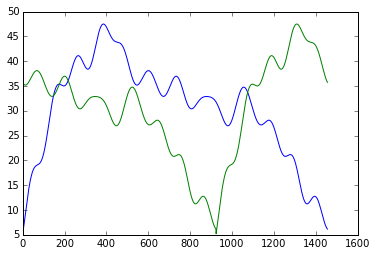

In [135]:
plot(data[:, start_idx:end_idx].mean(axis = 0))
plot(data_surr.mean(axis = 0))

In [136]:
df.query("pattern == 'R'")

,subj,task,cluster,pattern,elec,start_idx,end_idx,start_idx_resp,end_idx_resp,dropped,ROI
283,CP7,DecisionAud,4,R,18,1454,3049,-344,500,0,R
284,CP7,DecisionAud,4,R,19,600,986,-500,500,0,R
285,CP7,DecisionAud,4,R,28,959,2794,-438,500,0,R
286,CP7,DecisionAud,4,R,29,1461,2743,-400,500,0,R
287,CP7,DecisionAud,4,R,43,1390,2091,-198,432,0,R
288,CP7,DecisionAud,4,R,52,1300,2578,-485,500,0,R
289,CP7,DecisionAud,4,R,53,1550,2442,-154,500,0,R
290,GP15,EmoGen,3,R,22,653,2518,-499,473,0,Pre_centrl
291,GP15,EmoGen,3,R,23,751,3180,-498,499,0,Pre_centrl
292,GP15,EmoGen,3,R,29,112,3442,-433,499,0,Pre_centrl


In [242]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
bad_subjects = ['GP44','ST28','GP27']

df.pattern.value_counts()

R              300
D              279
SR             242
S              118
sustained       13
S+sustained      7
dtype: int64

[ 0.19070518  0.6838034 ]


(array([   8.,   15.,   49.,   90.,  129.,  173.,  233.,  182.,  103.,   18.]),
 array([-0.02657024,  0.0565905 ,  0.13975124,  0.22291198,  0.30607271,
         0.38923345,  0.47239419,  0.55555493,  0.63871566,  0.7218764 ,
         0.80503714]),
 <a list of 10 Patch objects>)

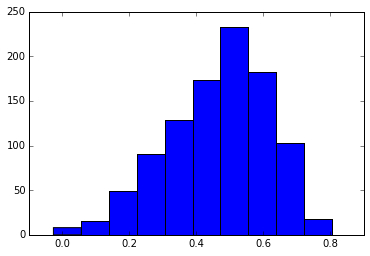

In [819]:
scores = (data_dict['scores'][0])
print np.percentile(scores, [5, 95])
hist(scores)

In [783]:
subj, task = ['ST27','DecisionVis']
e = 5
filename = os.path.join(SJdir, 'PCA', 'Stats', 'outliers','for_Correlation','elec_csvs', '_'.join(['ST27', 'DecisionVis', 'e'+str(5)+'.csv']))
df = pd.read_csv(filename)
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'data', ''.join([subj, '_', task, '.p']))
data_dict = pickle.load( open(filename, "rb" ) )

In [784]:
filename = os.path.join(SJdir,'PCA', 'Stats', 'single_electrode_windows_withdesignation_EDITED.csv')
df = pd.read_csv(filename)
start_idx = df.query("subj == 'ST27' and elec == 5").start_idx.iloc[0]
bl_st = 1000

In [785]:
means = data_dict['means'][5]
maxes = data_dict['maxes'][5]
lats = data_dict['lats'][5]

In [786]:
filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat')
data_dict = loadmat.loadmat(filename)
data = data_dict['data_percent']
elecs = data_dict['active_elecs']

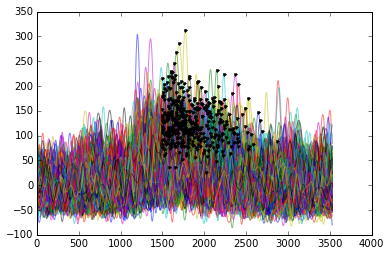

In [794]:
f, ax = plt.subplots()
ax.plot(data[0,:,:].transpose(), alpha = 0.5)
ax.plot(lats+bl_st+start_idx, maxes, 'k.')
plt.savefig('/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Stats/Correlations/ST27_DecisionVis_singletrial_maxes.png')

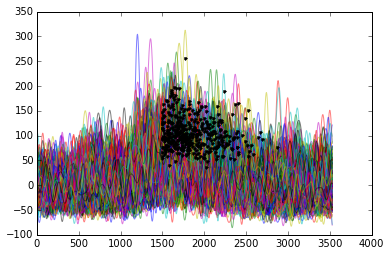

In [793]:
f, ax = plt.subplots()
ax.plot(data[0,:,:].transpose(), alpha = 0.5)
ax.plot(lats+bl_st+start_idx, maxes-means, 'k.')


('norm', 1.7394498716856663, -228.01138165326432)
skew fitted -0.06
skew data 0.36, pval 0.09


(array([ 0.63670352,  1.67134674,  1.27340704,  1.1938191 ,  1.51217086,
         1.35299498,  1.11423116,  0.71629146,  0.3979397 ,  0.55711558]),
 array([ 0.03942652,  0.1353404 ,  0.23125427,  0.32716815,  0.42308203,
         0.5189959 ,  0.61490978,  0.71082365,  0.80673753,  0.9026514 ,
         0.99856528]),
 <a list of 10 Patch objects>)

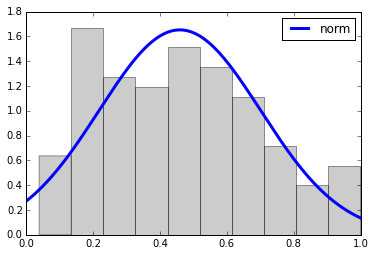

In [1064]:
import scipy.stats as stats

e = 9

y = np.array(df[e])
x = np.linspace(0,1, 1000)

f, ax = plt.subplots()

dist_names = ['norm']
for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc = param[-2], scale = param[-1])
    ax.plot(x, pdf_fitted, label = dist_name, lw = 3)
    
    #ks = stats.kstest(y, dist_name, param)
    sqerror_sum = np.log(sum(ci*(yi - ci)**2. for (ci, yi) in zip(y, pdf_fitted)))
    print (dist_name, sqerror_sum, sum(log(pdf_fitted)))
    n, min_max, mean, var, skew, kurt = stats.describe(pdf_fitted)
    print 'skew fitted %.2f' %(skew)
    n, min_max, mean, var, skew, kurt = stats.describe(y)
    print 'skew data %.2f, pval %.2f' %(skew, stats.skewtest(y)[1])
    
plt.legend(loc = 'upper right')
ax.hist(y, 10, color = 'gray', alpha = 0.4, normed = True)

In [1052]:
print zip(['n', 'min_max', 'mean', 'var', 'skew', 'kurt'], stats.describe(y))
print  zip(['n', 'min_max', 'mean', 'var', 'skew', 'kurt'], stats.describe(pdf_fitted))

[('n', 131), ('min_max', (0.039426523297491037, 0.99856527977044485)), ('mean', 0.4597115841265047), ('var', 0.058721981603787166), ('skew', 0.3568878213176433), ('kurt', -0.57539572276719)]
[('n', 1000), ('min_max', (0.13502501283595988, 1.6526216934267801)), ('mean', 0.95820577709823329), ('var', 0.24450782446148792), ('skew', -0.06234473909297065), ('kurt', -1.4150085329045132)]


In [1034]:
print median(y)
mean(y)

0.451742627346


0.4597115841265047

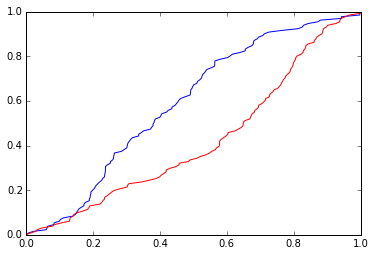

In [1025]:
sq = df[e].value_counts()
ecdf = sq.sort_index().cumsum()*1./len(sq)


e = 3
y = np.array(df[e])
sorteddf = np.sort(y)
yvals = np.arange(len(sorteddf))/float(len(sorteddf))

e = 16
y = np.array(df[e])
sorteddf2 = np.sort(y)
yvals2 = np.arange(len(sorteddf))/float(len(sorteddf))

plt.plot(sorteddf, yvals)
plt.plot(sorteddf2, yvals2, 'r')


In [45]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta'
df_pattern = pd.read_csv(os.path.join(SJdir, 'PCA','Stats', 'single_electrode_windows_withdesignation_EDITED_dropped.csv'))

subj_task = df_pattern[['subj', 'task']].drop_duplicates()

df_all = pd.DataFrame({'maxes':[], 'means':[], 'stds':[], 'lats_pro':[], 'pred_score':[], 'pval_predscore':[], 'alpha':[]})

for s_t in subj_task.itertuples():
    _, subj, task = s_t
    filename = os.path.join(SJdir, 'PCA','Stats','Regression', '_'.join([subj, task,'coefs.csv']))
    df = pd.read_csv(filename)
    df.columns = ['elec','maxes','means','stds','lats_pro','pred_score','pval_predscore','alpha']
    df['subj'] = [subj] * len(df)
    df['task'] = [task] * len(df)
    df_all = df_all.append(df)

In [46]:
df

,elec,maxes,means,stds,lats_pro,pred_score,pval_predscore,alpha,subj,task
0,2,-0.037020,-0.007843,0.024914,0.009771,-0.169137,0.311,10000.000000,ST6,SelfAud
1,40,0.013288,0.086749,-0.072279,-0.046129,0.084742,0.422,1291.549665,ST6,SelfAud
2,12,0.016134,0.007507,-0.024289,0.006676,-0.281628,0.223,10000.000000,ST6,SelfAud
3,49,-0.077263,0.036782,0.031832,0.017145,-0.117798,0.353,10000.000000,ST6,SelfAud
4,50,0.121506,-0.048598,-0.072812,-0.006201,-0.301977,0.210,10000.000000,ST6,SelfAud
5,51,-0.025639,0.002162,0.008722,-0.007283,-0.213866,0.291,10000.000000,ST6,SelfAud


In [51]:
df_all = pd.merge(df_all, df_pattern[['subj','task','elec', 'pattern']], how = 'outer')

In [52]:
df_all.columns

Index([u'alpha', u'elec', u'lats_pro', u'maxes', u'means', u'pred_score', u'pval_predscore', u'stds', u'subj', u'task', u'pattern'], dtype='object')

In [53]:
df_all = df_all[['subj','task','elec','pattern','maxes','means','stds','lats_pro','pred_score','pval_predscore','alpha']]

In [57]:
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'all_coefs_withpatterns.csv')
df_all.to_csv(filename)

In [4]:
import os
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist, squareform
import loadmat

In [12]:
subj = 'GP15'
task = 'EmoGen'
datadir = '/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Stats/PCA_means/'

filename = os.path.join(datadir, '_'.join([subj, task, 'loadings.csv']))
df = pd.DataFrame.from_csv(filename)
tmp = df.pop('fit.communality') #remove column
    
distance = pdist(df, 'correlation') #distance matrix
Z = hc.linkage(distance, method = 'complete') #linkage matrix

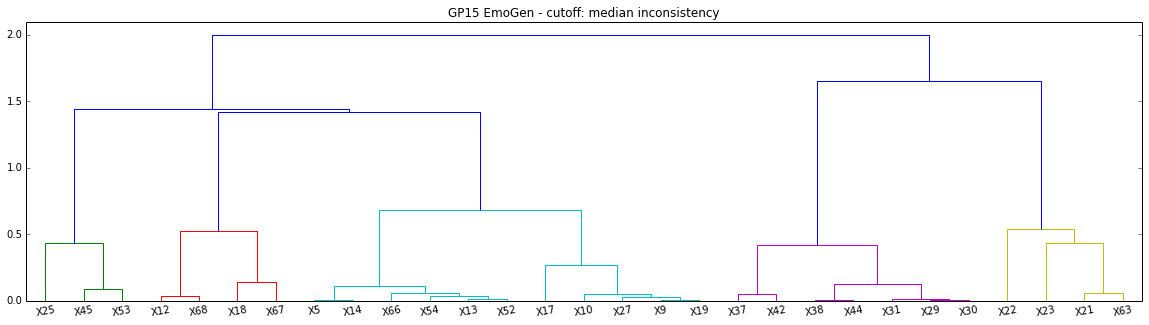

In [15]:
f, ax = plt.subplots(figsize = (20, 5))
incon = hc.inconsistent(Z) #inconsistency
cutoff = median(incon[:,-1])
dend = hc.dendrogram(Z, labels = df.index, color_threshold=cutoff)
title(' '.join([subj, task, '- cutoff: median inconsistency']))

In [18]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta'


In [23]:
filename = os.path.join(SJdir, 'PCA', 'Stats', 'PCA_means', '_'.join([subj, task]) + '_loadings.csv')
df = pd.read_csv(filename)

In [25]:
df.columns = ['elecs','PC1','PC2','PC3','PC4','fit']

In [28]:
df = df.set_index('elecs')
df.pop('fit')

array([[<matplotlib.axes.AxesSubplot object at 0x7f45cd2f9790>,
        <matplotlib.axes.AxesSubplot object at 0x7f45cd0746d0>]], dtype=object)

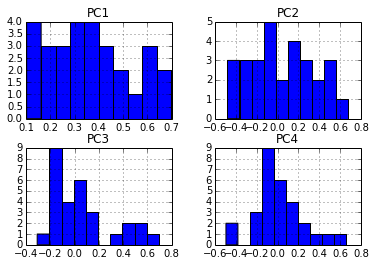

In [35]:
df.hist()

In [45]:
df.mean()

PC1    0.359063
PC2    0.039413
PC3    0.054578
PC4    0.011189
dtype: float64

In [44]:
df.median()

PC1    0.343441
PC2   -0.005931
PC3   -0.005650
PC4   -0.016606
dtype: float64

In [241]:
features = ['maxes','means','lats_pro','stds', 'maxes_rel','medians']
predictor = 'RTs'

In [242]:
data_dict = dict()
for j, f in enumerate(features):
    filename = os.path.join(SJdir, 'PCA', 'Stats', 'outliers', '_'.join([subj, task, f]) + '.csv')
    df = pd.read_csv(filename)
    df.columns = [int(x) for x in df.columns]
    data_dict[f] = dict(df)

filename = os.path.join(SJdir, 'PCA', 'Stats', 'outliers', '_'.join([subj, task, predictor]) + '.csv')
df = pd.read_csv(filename)
df.columns = [int(x) for x in df.columns]
data_dict[predictor] = dict(df)    


In [213]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'data',  '_'.join([subj, task]) + '.p')
data_dict_p = pickle.load(open(filename, 'rb'))


In [236]:
data_dict['medians'][13].shape

(111,)

In [224]:
data_dict_p['medians'][13].shape

(114,)

In [ ]:
#plot beta relationships

In [243]:
filename = os.path.join(SJdir, 'PCA', 'Stats', 'Regression', 'all_coefs_withpatterns.csv')
df = pd.read_csv(filename)


In [248]:
df.columns

Index([u'Unnamed: 0', u'subj', u'task', u'elec', u'pattern', u'maxes_rel', u'medians', u'stds', u'lats_pro', u'pred_score', u'pval_predscore', u'alpha'], dtype='object')

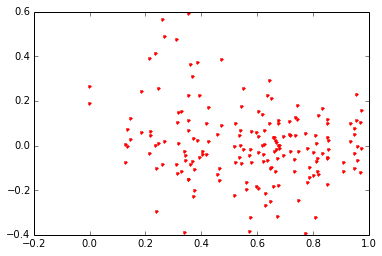

In [259]:
#plt.plot(df[df.pattern == 'D'].maxes_rel, df[df.pattern == 'D'].medians,'.')

plt.plot(df.query("pattern == 'D' & pred_score > 0.3 & pval_predscore < 0.05").maxes_rel, df.query("pattern == 'D' & pred_score > 0.3 & pval_predscore < 0.05").medians,'r.')
plt.plot(df.query("pattern == 'D' & pred_score > 0.3 & pval_predscore < 0.05").maxes_rel, df.query("pattern == 'D' & pred_score > 0.3 & pval_predscore < 0.05").lats_pro,'r.')


In [386]:
filename = os.path.join(SJdir, 'PCA','Stats', 'Regression', 'GP15_EmoGen.p')
data_dict = pickle.load(open(filename, 'rb'))

In [338]:
from scipy import stats

In [373]:
zcoefs = np.array(data_dict['zcoefs'])[0,:]
coefs = np.array(data_dict['coefs'][0])[:,0]

In [374]:
zcoefs

array([ 0.62201529, -0.07065392, -0.38317978, -0.03846038])

(array([  12.,   27.,    0.,   22.,  155.,   12.,  154.,  434.,  155.,   29.]),
 array([ 0.00319434,  0.09527871,  0.18736308,  0.27944744,  0.37153181,
         0.46361618,  0.55570055,  0.64778491,  0.73986928,  0.83195365,
         0.92403802]),
 <a list of 10 Patch objects>)

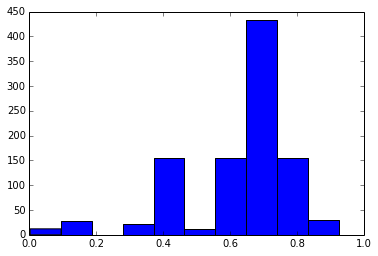

In [365]:
plt.hist(coefs)

1.20270460258e-15


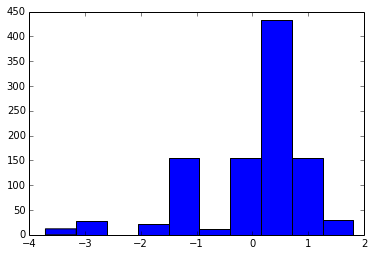

In [368]:
zcoefs = stats.zscore(coefs, axis = 0)
plt.hist(zcoefs)
print np.mean(zcoefs, axis = 0)

#coefs.sort()
#print(coefs[50], coefs[950])

In [396]:
from __future__ import division
import os
import numpy as np
import cPickle as pickle
import sys
import pandas as pd
from sklearn import cross_validation, grid_search
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt

In [390]:
features = ['maxes_rel','medians','stds','lats_pro']
predictor = 'RTs'
subj ='GP15'
task = 'EmoGen'

data_dict = dict()
for j, f in enumerate(features):
    filename = os.path.join(SJdir, 'PCA', 'Stats', 'outliers', '_'.join([subj, task, f]) + '.csv') #run on cleaned trials (outliers dropped)
    df = pd.read_csv(filename)
    df.columns = [int(x) for x in df.columns]
    data_dict[f] = dict(df)

In [393]:
filename = os.path.join(SJdir, 'PCA', 'Stats', 'outliers', '_'.join([subj, task, predictor]) + '.csv')
df = pd.read_csv(filename)
df.columns = [int(x) for x in df.columns]
data_dict[predictor] = dict(df)    

all_alphas, all_models, all_scores, all_coefs, all_scores_null, all_pval, all_zcoefs = [[] for i in range(7)]
elecs = data_dict['medians'].keys()

In [416]:
elec = 5 

#define data
X = np.array([data_dict[x][elec] for x in features]).T
Y = data_dict[predictor][elec]

#drop nans from data
mask = np.all(np.isnan(X), axis = 1)
X = X[~mask]
mask = np.isnan(Y)
Y = Y[~mask]        

#split data into training and test sets for the number of CV folds
cvs = cross_validation.ShuffleSplit(len(Y), n_iter = 100, test_size = 0.2)

alphas, models, scores, coefs, scores_null = [[] for i in range(5)]

In [417]:
for train, test in cvs:
    #scale training and test data
    X_train = scale(X[train].astype(float))
    X_test = scale(X[test].astype(float))
    y_train = scale(Y[train].astype(float))
    y_test = scale(Y[test].astype(float))

    #define model (search over 10 alphas)
    model = Ridge(solver = 'lsqr', normalize=False, fit_intercept=False)
    params_grid = {'alpha': np.logspace(-4, 4, 10)}
    ridge_grid = grid_search.GridSearchCV(model, params_grid, cv = 10)

    #fit and find best model
    ridge_grid.fit(X_train, y_train)
    mod = ridge_grid.best_estimator_
    score = np.corrcoef(mod.predict(X_test), y_test)[1,0]
    coef = mod.coef_
    a = mod.alpha

    #calculate permuted score
    idx = np.random.permutation(len(y_test))
    null_score = np.corrcoef(mod.predict(X_test), y_test[idx])[1,0] #predict on shuffled test set

    #add to list
    alphas.append(a)
    models.append(mod)
    scores.append(score)
    coefs.append(coef)
    scores_null.append(null_score)

In [421]:
if np.median(scores)>0:
    pval = 1 - (sum(np.median(scores) > scores_null)/ len(scores_null))
elif np.median(scores)<0:
    pval = 1 - (sum(np.median(scores) < scores_null) / len(scores_null))
else:
    pval = 1

(array([  3.,   3.,   2.,   7.,  12.,  17.,  22.,  19.,   9.,   6.]),
 array([-0.120768  , -0.03385985,  0.05304831,  0.13995647,  0.22686463,
         0.31377279,  0.40068095,  0.48758911,  0.57449726,  0.66140542,
         0.74831358]),
 <a list of 10 Patch objects>)

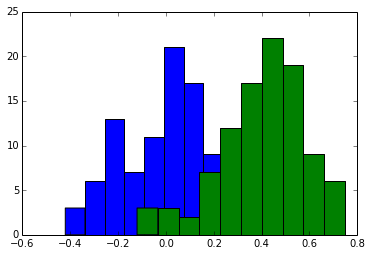

In [435]:
plt.hist(scores_null)
plt.hist(scores)

In [466]:
#zscore coefficients, take mean
zcoefs = stats.zscore(coefs, axis = 0)

In [479]:
stats.zscore(np.array(coefs)[:,0], axis = 0) == zcoefs[:,0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

0.63402771653


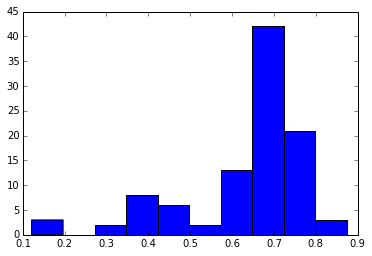

In [492]:
plt.hist(np.array(coefs)[:,0])
print np.array(coefs)[:,0].mean()

[ -5.47339951e-16   2.46469511e-16  -2.64788191e-16  -1.95399252e-16]
[ 0.63402772 -0.0689188  -0.38848014 -0.04102806]


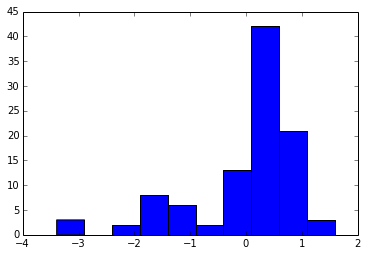

In [488]:
plt.hist(zcoefs[:,0])
print mean(zcoefs,axis = 0)
print mean(coefs, axis = 0)

([array([ 0.,  0.,  0.,  2.,  9.,  1.,  5.,  7.,  4.,  1.]),
  array([  0.,   0.,   0.,  15.,  14.,   0.,   0.,   0.,   0.,   0.]),
  array([  5.,   5.,   4.,   4.,  11.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   2.,  20.,   7.,   0.,   0.,   0.,   0.])],
 array([-0.73114042, -0.56123113, -0.39132185, -0.22141256, -0.05150328,
         0.11840601,  0.2883153 ,  0.45822458,  0.62813387,  0.79804316,
         0.96795244]),
 <a list of 4 Lists of Patches objects>)

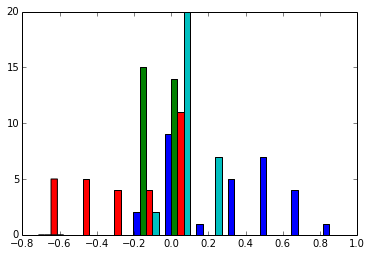

In [354]:
all_alphas.append(alphas)
all_models.append(models)
all_scores.append(scores)
all_coefs.append(coefs)
all_scores_null.append(scores_null)
all_pval.append(pval)
all_zcoefs.append(zcoefs)

In [428]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta'
df_details = pd.read_csv(os.path.join(SJdir, 'PCA','Stats','Regression','all_coefs_withpatterns_withROIs.csv'))

In [429]:
df = pd.read_csv(os.path.join(SJdir, 'PCA','Stats', 'PCA_medians','JH5_EmoRep_loadings.csv'))

In [430]:
colnames = list(df.columns)
colnames[0] = 'elec'
df.columns = colnames
df = df.set_index('elec')

In [431]:
#calculate threshold
thresh = np.min(np.max([df.max(axis = 1), abs(df.min(axis = 1))], axis = 0))
print thresh

0.442849253256


In [432]:
df_thresh = df>thresh
df_thresh = df[df_thresh] #threshold PCA matrix

In [433]:
df_thresh = df_thresh.reset_index()
df_thresh.elec = [int(x[1:]) for x in df_thresh.elec] #change elecs to ints

In [434]:
df_details_subj = df_details[(df_details.subj == 'JH5') & (df_details.task == 'EmoRep')].reset_index()[['elec','ROI','pattern']]

In [435]:
df_thresh = pd.merge(df_thresh, df_details_subj, on = 'elec')

In [436]:
colnames = list(df_thresh.columns)
colnames.insert(1, colnames.pop(colnames.index('pattern')))
colnames.insert(2, colnames.pop(colnames.index('ROI')))
df_thresh = df_thresh[colnames]

In [608]:
df_thresh.columns

Index([u'elec', u'pattern', u'ROI', u'max_pc', u'PC1', u'PC2', u'PC3', u'PC4', u'PC5', u'PC6', u'PC7', u'PC8', u'subj', u'pc_list'], dtype='object')

In [602]:
c = (df_thresh.iloc[:,4:-1])

pc_list = list()
for row in c.itertuples():
    tmp = np.array(row[1:])
    idx = ~np.isnan(tmp)
    tmp = tmp[idx]
    cols = c.columns[idx]
    
    idx = tmp.argsort()
    
    pc_list.append(list(cols[idx][::-1]))
    #tmp[idx][::-1]
df_thresh['pc_list'] = pc_list

In [240]:
#filename = os.path.join(SJdir, 'PCA','Stats', 'PCA_medians','JH5_EmoRep_thresh.csv')
#df_thresh.to_csv(filename, index= False)

In [224]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(['DATA', 'data 1','data ...','data n'])
G.add_edges_from([('DATA','data 1'), ('DATA', 'data ...'), ('DATA', 'data n')])


In [241]:
A = nx.to_agraph(G)

In [243]:
A.layout('neato')
A.draw('/home/knight/matar/tmp.png')

In [194]:
import pygraphviz as pgv

In [295]:
G = pgv.AGraph()


In [296]:

G.add_edges_from([('DATA','data1'), ('DATA', 'data2'), ('DATA', 'datan'), \
                  ('data1', 'peaks1,1'), ('data1','peaks1,2'), ('data1','peaks 1,n'), \
                  ('data2', 'peaks2,1'), ('data2', 'peaks2,2'), ('data2', 'peaks2,n'), \
                  ('datan', 'peaksn,1'), ('datan', 'peaksn,2'), ('datan', 'peaksn,n')])

for i in G.nodes():
    G.get_node(i).attr['shape'] = 'box'

In [301]:
G.get_edge('DATA','data1').attr['label'] = 'fit'

In [302]:
G.layout(prog='dot')
G.draw('/home/knight/matar/tmp.pdf')

In [304]:
df_designations = pd.read_csv(os.path.join(SJdir, 'PCA','Stats', 'single_electrode_windows_withdesignation_EDITED_dropped.csv'))

filename = os.path.join(SJdir, 'PCA','Stats', 'Correlations', 'feature_corrs', '_'.join(['GP15','EmoGen', 'feature_corrs_scaled.csv']))
df = pd.read_csv(filename)

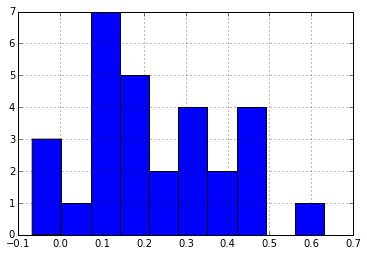

In [322]:
filename = os.path.join(SJdir, 'PCA','Stats','Regression','with_mins', 'all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
df.query("subj == 'GP15' and task == 'EmoGen'").pred_score.hist()


In [141]:

SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'

param = 'medians'
subj = 'CP7'
task = 'DecisionAud'

#load in PCA loadings
filename = os.path.join(SJdir, 'PCA', 'Stats', 'Networks', 'unsmoothed', '_'.join(['PCA', param]), '_'.join([subj, task, 'loadings.csv']))
df = pd.read_csv(filename)

#format dataframe
colnames = list(df.columns)
colnames[0] = 'elec'
df.columns = colnames
df = df.set_index('elec')

#calculate threshold
thresh = np.min(np.max([df.max(axis = 1), abs(df.min(axis = 1))], axis = 0))

#threshold PCA matrix
df_thresh = df>thresh
df_thresh = df[df_thresh] 


In [146]:
thresh

0.42653845183785